In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from scipy import signal
from google.colab import drive
drive.mount('drive/')
testpath = "drive/My Drive/Nursing Challenge/Test/"

In [ ]:
user27 = pd.read_pickle(testpath + "Cleaned/cleaned_user27.pkl", compression="bz2")

In [ ]:
user27

,user_id,datetime,x,y,z
0,46,2018-12-16 06:23:33.485,9.730,0.038,0.038
1,46,2018-12-16 06:00:51.516,9.347,0.076,0.246
2,46,2018-12-16 06:15:53.123,9.653,0.038,0.044
3,46,2018-12-16 06:31:22.772,9.692,0.076,0.044
4,46,2018-12-16 06:42:50.749,9.615,0.114,0.042
...,...,...,...,...,...
10206502,46,2018-12-10 01:44:55.275,9.423,0.191,0.160
10206503,46,2018-12-10 01:09:18.973,9.423,0.344,0.174
10206504,46,2018-12-10 01:32:52.384,9.385,0.306,0.162
10206505,46,2018-12-10 01:12:23.812,9.423,0.268,0.165


In [ ]:
len(user27) - len(user27[user27["user_id"]==46])

0

In [ ]:
user27.sort_values("datetime", ignore_index=True,inplace=True)
user27

,user_id,datetime,x,y,z
0,46,2018-11-29 13:57:58.001,-9.040,0.076,-0.455
1,46,2018-11-29 13:57:58.184,-9.155,0.000,-0.456
2,46,2018-12-03 17:29:20.724,-1.110,-0.574,4.903
3,46,2018-12-03 17:29:20.891,-9.960,0.000,-1.581
4,46,2018-12-03 17:29:20.905,-9.960,0.000,-1.581
...,...,...,...,...,...
10206502,46,2019-01-01 23:59:56.468,9.040,0.076,0.643
10206503,46,2019-01-01 23:59:56.666,9.002,0.076,0.641
10206504,46,2019-01-01 23:59:57.884,9.002,0.038,0.657
10206505,46,2019-01-01 23:59:57.884,9.002,0.038,0.657


In [ ]:
uid, start, finish, Time, X, Y, Z = [], [], [], [], [], [], []
for i in range(0, len(user27), 1000):
    st, end = i, i+1000
    if end > len(user27)-1:
        end = len(user27)-1
    uid.append(user27.loc[i,"user_id"])
    start.append(user27.loc[st,"datetime"])
    finish.append(user27.loc[end,"datetime"])
    Time.append(np.array(user27.loc[st:end-1,"datetime"]))
    X.append(np.array(user27.loc[st:end-1,"x"]))
    Y.append(np.array(user27.loc[st:end-1,"y"]))
    Z.append(np.array(user27.loc[st:end-1,"z"]))
u27 = pd.DataFrame([])
u27["user_id"] = uid
u27["start"] = start
u27["finish"] = finish
u27["Time"] = Time
u27["X"] = X
u27["Y"] = Y
u27["Z"] = Z

In [ ]:
u27

,user_id,start,finish,Time,X,Y,Z
0,46,2018-11-29 13:57:58.001,2018-12-03 17:37:17.604,"[2018-11-29T13:57:58.001000000, 2018-11-29T13:...","[-9.04, -9.155, -1.11, -9.96, -9.96, -9.921, -...","[0.076, 0.0, -0.574, 0.0, 0.0, 0.114, 0.076, 0...","[-0.455, -0.456, 4.9030000000000005, -1.581, -..."
1,46,2018-12-03 17:37:17.604,2018-12-03 17:43:26.133,"[2018-12-03T17:37:17.604000000, 2018-12-03T17:...","[-9.767999999999999, -9.767999999999999, -9.80...","[0.076, 0.114, 0.076, 0.076, 0.038, 0.076, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,46,2018-12-03 17:43:26.133,2018-12-03 17:50:00.808,"[2018-12-03T17:43:26.133000000, 2018-12-03T17:...","[-9.807, -9.807, -9.845, -9.807, -9.807, -9.80...","[0.038, 0.038, 0.076, 0.038, 0.038, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.002, -0..."
3,46,2018-12-03 17:50:00.808,2018-12-03 17:56:42.375,"[2018-12-03T17:50:00.808000000, 2018-12-03T17:...","[-9.807, -9.807, -9.767999999999999, -9.767999...","[0.076, 0.0, 0.114, 0.114, 0.114, 0.114, 0.114...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00..."
4,46,2018-12-03 17:56:42.375,2018-12-03 18:02:55.913,"[2018-12-03T17:56:42.375000000, 2018-12-03T17:...","[-9.845, -9.845, -9.845, -9.845, -9.845, -9.84...","[0.114, 0.114, 0.114, 0.114, 0.114, 0.114, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...
10202,46,2019-01-01 23:44:32.513,2019-01-01 23:48:09.133,"[2019-01-01T23:44:32.513000000, 2019-01-01T23:...","[8.964, 9.04, 9.04, 8.964, 9.04, 9.04, 9.04, 9...","[0.0, 0.0, 0.0, 0.0, -0.076, 0.0, 0.0, 0.0, 0....","[0.655, 0.691, 0.691, 0.688, 0.719000000000000..."
10203,46,2019-01-01 23:48:09.133,2019-01-01 23:52:04.965,"[2019-01-01T23:48:09.133000000, 2019-01-01T23:...","[9.079, 9.079, 9.079, 9.079, 9.079, 9.079, 9.0...","[-0.038, -0.038, 0.0, 0.0, 0.0, 0.0, -0.076, -...","[0.5589999999999999, 0.5589999999999999, 0.557..."
10204,46,2019-01-01 23:52:04.965,2019-01-01 23:55:17.182,"[2019-01-01T23:52:04.965000000, 2019-01-01T23:...","[9.079, 9.079, 9.079, 9.04, 9.04, 9.04, 9.04, ...","[-0.038, -0.038, -0.038, -0.076, -0.076, -0.07...","[0.669, 0.669, 0.669, 0.6729999999999999, 0.67..."
10205,46,2019-01-01 23:55:17.182,2019-01-01 23:58:37.464,"[2019-01-01T23:55:17.182000000, 2019-01-01T23:...","[9.002, 9.002, 9.04, 9.04, 9.04, 9.04, 9.079, ...","[0.0, 0.0, -0.038, -0.038, 0.038, 0.038, 0.038...","[0.617, 0.617, 0.602, 0.602, 0.57, 0.566000000..."


In [ ]:
test = u27.copy()
del u27, user27

In [ ]:
bp = [0]
uid, start, finish, Time, X, Y, Z = [], [], [], [], [], [], []
added = 0
for i in range(len(test)):
    for j in range(1,len(test.loc[i,"Time"])):
        if ((test.loc[i,"Time"][j] - test.loc[i,"Time"][j-1])/np.timedelta64(1, 's')) >= 3:
            bp.append(j)
    bp.append(len(test.loc[i,"Time"]))
    if len(bp) > 2:
        for k in range(1,len(bp)):
            uid.append(test.loc[i,"user_id"])
            start.append(test.loc[i,"Time"][bp[k-1]])
            finish.append(test.loc[i,"Time"][bp[k]-1])
            Time.append(np.array(test.loc[i,"Time"][bp[k-1]:bp[k]]))
            X.append(np.array(test.loc[i,"X"][bp[k-1]:bp[k]]))
            Y.append(np.array(test.loc[i,"Y"][bp[k-1]:bp[k]]))
            Z.append(np.array(test.loc[i,"Z"][bp[k-1]:bp[k]]))
        added += len(bp)-1
        test.drop(i)
    bp = [0]
    # if not i%200:
    #     print(i)
newdf = pd.DataFrame({"user_id":uid,"start":start,"finish":finish, "X":X,"Y":Y, "Z":Z,"Time":Time})
test = pd.concat([test,newdf], ignore_index=True)
print("Total",added, "row added")

In [ ]:
print(len(test))
print(len(test[test["user_id"]==46]))

103382
93175


In [ ]:
test

,user_id,start,finish,Time,X,Y,Z
0,27,2018-11-29 13:57:58.001,2018-12-03 17:37:17.604,"[2018-11-29T13:57:58.001000000, 2018-11-29T13:...","[-9.04, -9.155, -1.11, -9.96, -9.96, -9.921, -...","[0.076, 0.0, -0.574, 0.0, 0.0, 0.114, 0.076, 0...","[-0.455, -0.456, 4.9030000000000005, -1.581, -..."
1,27,2018-12-03 17:37:17.604,2018-12-03 17:43:26.133,"[2018-12-03T17:37:17.604000000, 2018-12-03T17:...","[-9.767999999999999, -9.767999999999999, -9.80...","[0.076, 0.114, 0.076, 0.076, 0.038, 0.076, 0.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,27,2018-12-03 17:43:26.133,2018-12-03 17:50:00.808,"[2018-12-03T17:43:26.133000000, 2018-12-03T17:...","[-9.807, -9.807, -9.845, -9.807, -9.807, -9.80...","[0.038, 0.038, 0.076, 0.038, 0.038, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.002, -0..."
3,27,2018-12-03 17:50:00.808,2018-12-03 17:56:42.375,"[2018-12-03T17:50:00.808000000, 2018-12-03T17:...","[-9.807, -9.807, -9.767999999999999, -9.767999...","[0.076, 0.0, 0.114, 0.114, 0.114, 0.114, 0.114...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00..."
4,27,2018-12-03 17:56:42.375,2018-12-03 18:02:55.913,"[2018-12-03T17:56:42.375000000, 2018-12-03T17:...","[-9.845, -9.845, -9.845, -9.845, -9.845, -9.84...","[0.114, 0.114, 0.114, 0.114, 0.114, 0.114, 0.1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...
103377,46,2019-01-01 23:58:37.464,2019-01-01 23:58:58.662,"[2019-01-01T23:58:37.464000000, 2019-01-01T23:...","[8.925, 8.925, 8.925, 8.925, 9.002, 9.002, 9.0...","[-0.038, -0.038, -0.038, -0.038, 0.0, 0.0, 0.0...","[0.7340000000000001, 0.7340000000000001, 0.734..."
103378,46,2019-01-01 23:59:01.663,2019-01-01 23:59:05.470,"[2019-01-01T23:59:01.663000000, 2019-01-01T23:...","[9.002, 9.079, 9.079, 9.04, 9.04, 9.04, 9.04, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6759999999999999, 0.6459999999999999, 0.645..."
103379,46,2019-01-01 23:59:09.862,2019-01-01 23:59:15.695,"[2019-01-01T23:59:09.862000000, 2019-01-01T23:...","[9.04, 9.04, 9.04, 9.04, 9.002, 9.002, 9.002, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.617, 0.617, 0.617, 0.617, 0.645, 0.645, 0.6..."
103380,46,2019-01-01 23:59:18.863,2019-01-01 23:59:32.922,"[2019-01-01T23:59:18.863000000, 2019-01-01T23:...","[9.04, 9.04, 9.04, 9.04, 9.002, 9.002, 9.04, 9...","[0.038, 0.038, 0.038, 0.038, 0.0, 0.0, 0.0, 0....","[0.627, 0.627, 0.627, 0.627, 0.73, 0.73, 0.738..."


In [ ]:
test["length"] = test.Time.apply(len)
test

,user_id,start,finish,Time,X,Y,Z,length
0,46,2018-12-16 06:23:33.485,2018-12-06 11:59:23.364,"[2018-12-16T06:23:33.485000000, 2018-12-16T06:...","[9.73, 9.347000000000001, 9.652999999999999, 9...","[0.038, 0.076, 0.038, 0.076, 0.114, 0.114, 0.0...","[0.038, 0.24600000000000002, 0.044000000000000...",1000
1,46,2018-12-06 11:59:23.364,2018-12-19 16:22:14.537,"[2018-12-06T11:59:23.364000000, 2018-12-06T12:...","[9.002, 9.155, 9.883, 9.155, 9.807, 9.807, 9.8...","[-0.038, 0.0, -0.076, -0.038, -0.114, -0.114, ...","[-0.535, -0.512, -0.011000000000000001, -0.507...",1000
2,46,2018-12-19 16:22:14.537,2018-12-19 16:41:26.209,"[2018-12-19T16:22:14.537000000, 2018-12-19T16:...","[-9.002, -8.925, -9.002, -9.002, -8.964, -9.04...","[0.38299999999999995, 0.344, 0.382999999999999...","[-0.868, -0.8909999999999999, -0.8340000000000...",1000
3,46,2018-12-19 16:41:26.209,2018-12-28 03:44:46.933,"[2018-12-19T16:41:26.209000000, 2018-12-19T16:...","[-9.002, -8.925, -8.925, -8.887, -9.002, -8.92...","[0.268, 0.344, 0.344, 0.42100000000000004, 0.2...","[-0.9329999999999999, -0.875, -0.85, -0.863, -...",1000
4,46,2018-12-28 03:44:46.933,2018-12-31 02:21:09.823,"[2018-12-28T03:44:46.933000000, 2018-12-28T02:...","[-9.079, -9.079, -9.155, -9.155, -9.117, -9.11...","[0.153, 0.153, 0.153, 0.153, 0.153, 0.153, 0.1...","[-0.507, -0.507, -0.508, -0.508, -0.508, -0.50...",1000
...,...,...,...,...,...,...,...,...
5106096,46,2018-12-10 01:49:16.307,2018-12-10 00:56:43.070,"[2018-12-10T01:49:16.307000000, 2018-12-10T01:...","[9.462, 9.423, 9.5]","[0.306, 0.306, 0.306]","[0.166, 0.159, 0.161]",3
5106097,46,2018-12-10 01:20:09.273,2018-12-10 01:20:09.273,[2018-12-10T01:20:09.273000000],[9.423],[0.306],[0.158],1
5106098,46,2018-12-10 01:27:48.914,2018-12-10 01:27:48.914,[2018-12-10T01:27:48.914000000],[9.5],[0.268],[0.16399999999999998],1
5106099,46,2018-12-10 01:44:55.275,2018-12-10 01:09:18.973,"[2018-12-10T01:44:55.275000000, 2018-12-10T01:...","[9.423, 9.423]","[0.191, 0.344]","[0.16, 0.174]",2


In [ ]:
test = test[test["length"]>12]
test.reset_index(drop=True, inplace=True)
test

In [ ]:
test.to_pickle(testpath + "Filtered/continuous_test_u27.pkl")

# MF

In [ ]:
test["MF_X"] = test["X"].apply(signal.medfilt, kernel_size=5)
test["MF_Y"] = test["Y"].apply(signal.medfilt, kernel_size=5)
test["MF_Z"] = test["Z"].apply(signal.medfilt, kernel_size=5)
len(test.loc[0,"MF_X"]) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

1000

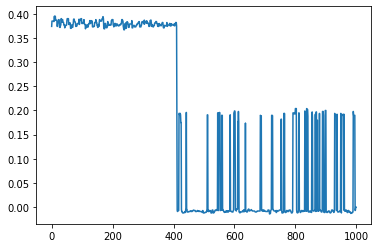

In [ ]:
plt.plot(test.loc[34,"MF_Z"])

In [ ]:
test.reset_index(drop=True, inplace=True)
test

,user_id,start,finish,Time,X,Y,Z,length,MF_X,MF_Y,MF_Z
0,46,2018-12-16 06:23:33.485,2018-12-06 11:59:23.364,"[2018-12-16T06:23:33.485000000, 2018-12-16T06:...","[9.73, 9.347000000000001, 9.652999999999999, 9...","[0.038, 0.076, 0.038, 0.076, 0.114, 0.114, 0.0...","[0.038, 0.24600000000000002, 0.044000000000000...",1000,"[9.347000000000001, 9.652999999999999, 9.65299...","[0.038, 0.038, 0.076, 0.076, 0.076, 0.076, 0.0...","[0.038, 0.044000000000000004, 0.04400000000000..."
1,46,2018-12-06 11:59:23.364,2018-12-19 16:22:14.537,"[2018-12-06T11:59:23.364000000, 2018-12-06T12:...","[9.002, 9.155, 9.883, 9.155, 9.807, 9.807, 9.8...","[-0.038, 0.0, -0.076, -0.038, -0.114, -0.114, ...","[-0.535, -0.512, -0.011000000000000001, -0.507...",1000,"[9.002, 9.155, 9.155, 9.807, 9.807, 9.807, 9.8...","[0.0, -0.038, -0.038, -0.076, -0.076, -0.038, ...","[-0.011000000000000001, -0.507, -0.507, -0.017..."
2,46,2018-12-19 16:22:14.537,2018-12-19 16:41:26.209,"[2018-12-19T16:22:14.537000000, 2018-12-19T16:...","[-9.002, -8.925, -9.002, -9.002, -8.964, -9.04...","[0.38299999999999995, 0.344, 0.382999999999999...","[-0.868, -0.8909999999999999, -0.8340000000000...",1000,"[-8.925, -9.002, -9.002, -9.002, -9.002, -8.96...","[0.344, 0.344, 0.344, 0.344, 0.344, 0.344, 0.3...","[-0.8340000000000001, -0.868, -0.868, -0.89099..."
3,46,2018-12-19 16:41:26.209,2018-12-28 03:44:46.933,"[2018-12-19T16:41:26.209000000, 2018-12-19T16:...","[-9.002, -8.925, -8.925, -8.887, -9.002, -8.92...","[0.268, 0.344, 0.344, 0.42100000000000004, 0.2...","[-0.9329999999999999, -0.875, -0.85, -0.863, -...",1000,"[-8.925, -8.925, -8.925, -8.925, -8.925, -8.96...","[0.268, 0.344, 0.344, 0.344, 0.344, 0.38299999...","[-0.85, -0.863, -0.863, -0.863, -0.86, -0.86, ..."
4,46,2018-12-28 03:44:46.933,2018-12-31 02:21:09.823,"[2018-12-28T03:44:46.933000000, 2018-12-28T02:...","[-9.079, -9.079, -9.155, -9.155, -9.117, -9.11...","[0.153, 0.153, 0.153, 0.153, 0.153, 0.153, 0.1...","[-0.507, -0.507, -0.508, -0.508, -0.508, -0.50...",1000,"[-9.079, -9.079, -9.117, -9.117, -9.117, -9.11...","[0.153, 0.153, 0.153, 0.153, 0.153, 0.153, 0.1...","[-0.507, -0.507, -0.508, -0.508, -0.508, -0.50..."
...,...,...,...,...,...,...,...,...,...,...,...
10202,46,2018-12-18 23:37:05.243,2019-01-01 08:16:58.704,"[2018-12-18T23:37:05.243000000, 2018-12-18T22:...","[-7.776, -3.677, -3.562, -5.593, -6.857, -1.22...","[4.482, 6.32, 6.435, 8.696, 6.282, 9.998, 5.28...","[-1.214, 6.479, 6.478, 0.087, -0.133, 0.006, 0...",1000,"[-3.562, -3.677, -5.593, -3.677, -5.593, -6.62...","[4.482, 6.32, 6.32, 6.435, 6.435, 7.1629999999...","[0.0, 0.087, 0.087, 0.087, 0.006, 0.001, 0.001..."
10203,46,2019-01-01 08:16:58.704,2019-01-01 08:28:54.933,"[2019-01-01T08:16:58.704000000, 2019-01-01T08:...","[-8.734, -8.734, -8.734, -8.734, -8.734, -8.73...","[0.8809999999999999, 0.38299999999999995, 0.42...","[-2.229, -1.974, -1.8940000000000001, -2.024, ...",1000,"[-8.734, -8.734, -8.734, -8.734, -8.734, -8.73...","[0.38299999999999995, 0.38299999999999995, 0.3...","[-1.8940000000000001, -1.974, -1.974, -1.974, ..."
10204,46,2019-01-01 08:28:54.933,2019-01-01 09:05:27.883,"[2019-01-01T08:28:54.933000000, 2019-01-01T08:...","[-8.81, -8.81, -8.81, -8.81, -8.81, -8.81, -8....","[0.45899999999999996, 0.42100000000000004, 0.4...","[-1.906, -1.88, -1.969, -1.8319999999999999, -...",1000,"[-8.81, -8.81, -8.81, -8.81, -8.81, -8.81, -8....","[0.42100000000000004, 0.42100000000000004, 0.4...","[-1.88, -1.88, -1.906, -1.88, -1.969, -1.879, ..."
10205,46,2019-01-01 09:05:27.883,2019-01-01 10:45:05.223,"[2019-01-01T09:05:27.883000000, 2019-01-01T08:...","[-8.849, -8.849, -8.849, -8.849, -8.849, -8.84...","[0.38299999999999995, 0.38299999999999995, 0.4...","[-1.9340000000000002, -1.959, -1.876, -1.91400...",1000,"[-8.849, -8.849, -8.849, -8.849, -8.849, -8.84...","[0.38299999999999995, 0.38299999999999995, 0.3...","[-1.876, -1.9140000000000001, -1.9140000000000..."


In [ ]:
test.to_pickle(testpath + "Filtered/mf_labeled_test_u27.pkl")

In [ ]:
len(test[test["start"]==test["finish"]])

0

# Resampling

In [ ]:
rsx = []
rsy = []
rsz = []
rst = []
for i in test.index:
    df = pd.DataFrame({"x":test.MF_X[i], "y":test.MF_Y[i], "z":test.MF_Z[i], \
                       "t":test.loc[i,"Time"]})
    df.drop_duplicates("t", inplace=True, ignore_index=True)
    df.set_index("t", inplace = True)
    resampled = df.resample("500ms").bfill(limit=1).interpolate(method="linear")
    rsx.append(np.array(resampled["x"]))
    rsy.append(np.array(resampled["y"]))
    rsz.append(np.array(resampled["z"]))
    rst.append(np.array(resampled.index))
test["X"], test["Y"], test["Z"], test["T"] = rsx, rsy, rsz, rst

In [ ]:
test.reset_index(drop=True, inplace=True)

In [ ]:
test

In [ ]:
method="linear"
example = 1200
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(test.loc[example,"Time"], test.loc[example,"MF_Z"])
plt.title("Before Resampling")
plt.subplot(1,2,2)
plt.plot(test.loc[example,"T"], test.loc[example,"Z"])
plt.title("After Resampling")
plt.gcf().suptitle(f"Resampling at 20Hz Method: {method} Example: {example}")

In [ ]:
test.drop(columns=["Time", "MF_X", "MF_Y", "MF_Z"], inplace=True)
test.head()

In [ ]:
test.columns = ["user_id", "start", "finish", "X", "Y", "Z", "Time"]

In [ ]:
test["length"] = test.Time.apply(len)

In [ ]:
len(test)

In [ ]:
test = test[test["length"]>12]

In [ ]:
len(test)

In [ ]:
test.reset_index(drop=True, inplace=True)

# Windowing 2

In [ ]:
test = test.drop(columns=["length"])

In [ ]:
bp = [0]
added = 0
uid, start, finish, Time, X, Y, Z = [], [], [], [], [], [], []
for i in range(len(test)):
    if len(test.loc[i,"Time"]) < 300:
        continue
    bp.extend([j for j in range(0,len(test.loc[i,"Time"])-150,150)])
    bp.append(len(test.loc[i,"Time"]))
    if len(bp) > 2:
        for k in range(1,len(bp)):
            uid.append(test.loc[i,"user_id"])
            start.append(pd.to_datetime(test.loc[i,"Time"][bp[k-1]]))
            finish.append(pd.to_datetime(test.loc[i,"Time"][bp[k]-1]))
            Time.append(np.array(test.loc[i,"Time"][bp[k-1]:bp[k]]))
            X.append(np.array(test.loc[i,"X"][bp[k-1]:bp[k]]))
            Y.append(np.array(test.loc[i,"Y"][bp[k-1]:bp[k]]))
            Z.append(np.array(test.loc[i,"Z"][bp[k-1]:bp[k]]))
        added += len(bp)-2
        test.drop(i)
    bp = [0]
    # if not i%200:
    #   print(i)
newdf = pd.DataFrame({"user_id":uid, "start":start, "finish":finish, "X":X,"Y":Y, "Z":Z,"Time":Time})
test = pd.concat([test,newdf], ignore_index=True)
print("Total",added, "row added")

In [ ]:
test.to_pickle(testpath + "Feature/windowed_testu27.pkl", compression="gzip")

#  Frequency and Time Domain Data

In [ ]:
test = pd.read_pickle(testpath + "NewFeature/windowed_testu27.pkl", compression="gzip")
test

,user_id,start,finish,X,Y,Z,Time
0,27,2018-12-01 00:08:55.450,2018-12-01 00:39:37.574,"[9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5, ...","[0.0, 0.038, 0.03634782608695652, 0.0346956521...","[0.11699999999999999, 0.12, 0.12, 0.12, 0.12, ...","[2018-12-01T00:08:55.000000000, 2018-12-01T00:..."
1,27,2018-12-01 00:39:37.574,2018-12-01 01:09:07.855,"[9.538, 9.538, 9.538, 9.538, 9.538, 9.538, 9.5...","[0.0, -0.0033043478260869562, -0.0066086956521...","[0.107, 0.10717391304347826, 0.107347826086956...","[2018-12-01T00:39:37.500000000, 2018-12-01T00:..."
2,27,2018-12-01 01:09:07.855,2018-12-01 01:21:22.266,"[9.5, 9.503208333333333, 9.506416666666667, 9....","[0.038, 0.038, 0.038, 0.038, 0.038, 0.038, 0.0...","[0.106, 0.10608333333333334, 0.106166666666666...","[2018-12-01T01:09:07.500000000, 2018-12-01T01:..."
3,27,2018-12-01 01:21:22.266,2018-12-01 01:27:45.863,"[9.538, 9.538, 9.615, 9.577, 9.577, 9.5, 9.538...","[0.076, 0.0, 0.038, 0.038, 0.0, 0.038, 0.038, ...","[0.127, 0.11699999999999999, 0.116999999999999...","[2018-12-01T01:21:22.000000000, 2018-12-01T01:..."
4,27,2018-12-01 01:27:45.863,2018-12-01 01:32:42.718,"[9.462, 9.538, 9.538, 9.538, 9.538, 9.538, 9.5...","[0.0, -0.038, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.11699999999999999, 0.11699999999999999, 0.1...","[2018-12-01T01:27:45.500000000, 2018-12-01T01:..."
...,...,...,...,...,...,...,...
93509,27,2019-01-01 09:13:46.500,2019-01-01 09:15:01.000,"[-8.312000000000001, -8.312000000000001, -8.31...","[-0.114, -0.114, -0.114, -0.114, -0.114, -0.11...","[-4.5569999999999995, -4.5569999999999995, -4....","[2019-01-01T09:13:46.500000000, 2019-01-01T09:..."
93510,27,2019-01-01 09:15:01.500,2019-01-01 09:16:20.500,"[-8.351, -8.351, -8.351, -8.351, -8.351, -8.35...","[-0.114, -0.076, -0.076, -0.076, -0.076, -0.07...","[-4.571000000000001, -4.551, -4.549, -4.547000...","[2019-01-01T09:15:01.500000000, 2019-01-01T09:..."
93511,27,2019-01-01 09:35:48.500,2019-01-01 09:39:04.500,[],[],[],[]
93512,27,2019-01-01 09:35:48.500,2019-01-01 09:37:03.000,"[-8.351, -8.351, -8.351, -8.351, -8.351, -8.35...","[-0.153, -0.153, -0.153, -0.153, -0.153, -0.15...","[-4.523, -4.538, -4.553, -4.553, -4.5485, -4.5...","[2019-01-01T09:35:48.500000000, 2019-01-01T09:..."


In [ ]:
from scipy.fftpack import fft
from scipy import stats

In [ ]:
test["length"] = test.Time.apply(len)
print(len(test))
test = test[test["length"]>12]
test.reset_index(drop=True, inplace=True)
len(test)

93514


85333

In [ ]:
fs = 2
fc = 0.02
bx, by, bz = [], [], []
for i in range(len(test)):
    b, a = signal.butter(3, fc/(fs/2), "high")
    bx.append(signal.filtfilt(b,a,test.loc[i,"X"]))
    by.append(signal.filtfilt(b,a,test.loc[i,"Y"]))
    bz.append(signal.filtfilt(b,a,test.loc[i,"Z"]))
test["tbody-X"] = bx
test["tbody-Y"] = by
test["tbody-Z"] = bz
test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,user_id,start,finish,X,Y,Z,Time,length,tbody-X,tbody-Y,tbody-Z
0,27,2018-12-01 00:08:55.450,2018-12-01 00:39:37.574,"[9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5, ...","[0.0, 0.038, 0.03634782608695652, 0.0346956521...","[0.11699999999999999, 0.12, 0.12, 0.12, 0.12, ...","[2018-12-01T00:08:55.000000000, 2018-12-01T00:...",3686,"[-0.0007722410588600421, -0.001041520541842310...","[0.003215610422342932, 0.04065168379944347, 0....","[-6.918511720127325e-05, 0.0028092025532682587..."
1,27,2018-12-01 00:39:37.574,2018-12-01 01:09:07.855,"[9.538, 9.538, 9.538, 9.538, 9.538, 9.538, 9.5...","[0.0, -0.0033043478260869562, -0.0066086956521...","[0.107, 0.10717391304347826, 0.107347826086956...","[2018-12-01T00:39:37.500000000, 2018-12-01T00:...",3540,"[-0.0050228480061283685, -0.00541600298875082,...","[-0.0038484528095745867, -0.006325860152712859...","[-0.0002639264929829196, -0.000184373421280636..."
2,27,2018-12-01 01:09:07.855,2018-12-01 01:21:22.266,"[9.5, 9.503208333333333, 9.506416666666667, 9....","[0.038, 0.038, 0.038, 0.038, 0.038, 0.038, 0.0...","[0.106, 0.10608333333333334, 0.106166666666666...","[2018-12-01T01:09:07.500000000, 2018-12-01T01:...",1470,"[-0.006013076541805934, -0.0048225625617950504...","[0.0029761230439208624, 0.0034036771139302957,...","[-6.74744502157535e-05, -4.321430516307398e-05..."
3,27,2018-12-01 01:21:22.266,2018-12-01 01:27:45.863,"[9.538, 9.538, 9.615, 9.577, 9.577, 9.5, 9.538...","[0.076, 0.0, 0.038, 0.038, 0.0, 0.038, 0.038, ...","[0.127, 0.11699999999999999, 0.116999999999999...","[2018-12-01T01:21:22.000000000, 2018-12-01T01:...",768,"[-0.0012614867781488882, -0.002787355531220311...","[0.003861004977604124, -0.0684943354353793, -0...","[-0.0011463743747792826, -0.010635777917030981..."
4,27,2018-12-01 01:27:45.863,2018-12-01 01:32:42.718,"[9.462, 9.538, 9.538, 9.538, 9.538, 9.538, 9.5...","[0.0, -0.038, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.11699999999999999, 0.11699999999999999, 0.1...","[2018-12-01T01:27:45.500000000, 2018-12-01T01:...",595,"[-0.0014722524579034307, 0.0712312825208741, 0...","[0.0003804450219912839, -0.03760753920359856, ...","[-0.0007474293013524722, -0.000579760210379195..."


In [ ]:
del bx,by,bz

In [ ]:
fs = 2
fc = 0.02
gx, gy, gz = [], [], []
for i in range(len(test)):
    b, a = signal.butter(3, fc/(fs/2))
    gx.append(signal.filtfilt(b,a,test.loc[i,"X"]))
    gy.append(signal.filtfilt(b,a,test.loc[i,"Y"]))
    gz.append(signal.filtfilt(b,a,test.loc[i,"Z"]))
test["tgravity-X"] = gx
test["tgravity-Y"] = gy
test["tgravity-Z"] = gz
test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,user_id,start,finish,X,Y,Z,Time,length,tbody-X,tbody-Y,tbody-Z,tgravity-X,tgravity-Y,tgravity-Z
0,27,2018-12-01 00:08:55.450,2018-12-01 00:39:37.574,"[9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5, ...","[0.0, 0.038, 0.03634782608695652, 0.0346956521...","[0.11699999999999999, 0.12, 0.12, 0.12, 0.12, ...","[2018-12-01T00:08:55.000000000, 2018-12-01T00:...",3686,"[-0.0007722410588600421, -0.001041520541842310...","[0.003215610422342932, 0.04065168379944347, 0....","[-6.918511720127325e-05, 0.0028092025532682587...","[9.500772241040977, 9.501041520523476, 9.50132...","[-0.0032156104223309513, -0.002651683799430844...","[0.11706918511703929, 0.11719079744656846, 0.1..."
1,27,2018-12-01 00:39:37.574,2018-12-01 01:09:07.855,"[9.538, 9.538, 9.538, 9.538, 9.538, 9.538, 9.5...","[0.0, -0.0033043478260869562, -0.0066086956521...","[0.107, 0.10717391304347826, 0.107347826086956...","[2018-12-01T00:39:37.500000000, 2018-12-01T00:...",3540,"[-0.0050228480061283685, -0.00541600298875082,...","[-0.0038484528095745867, -0.006325860152712859...","[-0.0002639264929829196, -0.000184373421280636...","[9.543022847978506, 9.543416002960988, 9.54381...","[0.003848452809544632, 0.0030215123265946637, ...","[0.10726392649282672, 0.10735828646460038, 0.1..."
2,27,2018-12-01 01:09:07.855,2018-12-01 01:21:22.266,"[9.5, 9.503208333333333, 9.506416666666667, 9....","[0.038, 0.038, 0.038, 0.038, 0.038, 0.038, 0.0...","[0.106, 0.10608333333333334, 0.106166666666666...","[2018-12-01T01:09:07.500000000, 2018-12-01T01:...",1470,"[-0.006013076541805934, -0.0048225625617950504...","[0.0029761230439208624, 0.0034036771139302957,...","[-6.74744502157535e-05, -4.321430516307398e-05...","[9.506013076526187, 9.50803089587934, 9.510056...","[0.03502387695606453, 0.0345963228860553, 0.03...","[0.1060674744500517, 0.10612654763833099, 0.10..."
3,27,2018-12-01 01:21:22.266,2018-12-01 01:27:45.863,"[9.538, 9.538, 9.615, 9.577, 9.577, 9.5, 9.538...","[0.076, 0.0, 0.038, 0.038, 0.0, 0.038, 0.038, ...","[0.127, 0.11699999999999999, 0.116999999999999...","[2018-12-01T01:21:22.000000000, 2018-12-01T01:...",768,"[-0.0012614867781488882, -0.002787355531220311...","[0.003861004977604124, -0.0684943354353793, -0...","[-0.0011463743747792826, -0.010635777917030981...","[9.539261486762602, 9.54078735551544, 9.542306...","[0.07213899502132459, 0.06849433543430994, 0.0...","[0.12814637437440732, 0.12763577791664857, 0.1..."
4,27,2018-12-01 01:27:45.863,2018-12-01 01:32:42.718,"[9.462, 9.538, 9.538, 9.538, 9.538, 9.538, 9.5...","[0.0, -0.038, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.11699999999999999, 0.11699999999999999, 0.1...","[2018-12-01T01:27:45.500000000, 2018-12-01T01:...",595,"[-0.0014722524579034307, 0.0712312825208741, 0...","[0.0003804450219912839, -0.03760753920359856, ...","[-0.0007474293013524722, -0.000579760210379195...","[9.46347225242664, 9.466768717433768, 9.470062...","[-0.00038044496272965594, -0.00039246073947675...","[0.11774742928860146, 0.11757976019887913, 0.1..."


In [ ]:
del gx,gy,gz

In [ ]:
jerk_x = []
jerk_y = []
jerk_z = []
for i in range(len(test)):
    jerk_x.append(np.gradient(test.loc[i,"tbody-X"]))
    jerk_y.append(np.gradient(test.loc[i,"tbody-Y"]))
    jerk_z.append(np.gradient(test.loc[i,"tbody-Z"]))
test["tjerk-X"] = jerk_x
test["tjerk-Y"] = jerk_y
test["tjerk-Z"] = jerk_z
test.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

,user_id,start,finish,X,Y,Z,Time,length,tbody-X,tbody-Y,tbody-Z,tgravity-X,tgravity-Y,tgravity-Z,tjerk-X,tjerk-Y,tjerk-Z
0,27,2018-12-01 00:08:55.450,2018-12-01 00:39:37.574,"[9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5, ...","[0.0, 0.038, 0.03634782608695652, 0.0346956521...","[0.11699999999999999, 0.12, 0.12, 0.12, 0.12, ...","[2018-12-01T00:08:55.000000000, 2018-12-01T00:...",3686,"[-0.0007722410588600421, -0.001041520541842310...","[0.003215610422342932, 0.04065168379944347, 0....","[-6.918511720127325e-05, 0.0028092025532682587...","[9.500772241040977, 9.501041520523476, 9.50132...","[-0.0032156104223309513, -0.002651683799430844...","[0.11706918511703929, 0.11719079744656846, 0.1...","[-0.0002692794829822683, -0.000278378137159634...","[0.03743607337710054, 0.01761594279777974, -0....","[0.002878387670469532, 0.0013788403132496624, ..."
1,27,2018-12-01 00:39:37.574,2018-12-01 01:09:07.855,"[9.538, 9.538, 9.538, 9.538, 9.538, 9.538, 9.5...","[0.0, -0.0033043478260869562, -0.0066086956521...","[0.107, 0.10717391304347826, 0.107347826086956...","[2018-12-01T00:39:37.500000000, 2018-12-01T00:...",3540,"[-0.0050228480061283685, -0.00541600298875082,...","[-0.0038484528095745867, -0.006325860152712859...","[-0.0002639264929829196, -0.000184373421280636...","[9.543022847978506, 9.543416002960988, 9.54381...","[0.003848452809544632, 0.0030215123265946637, ...","[0.10726392649282672, 0.10735828646460038, 0.1...","[-0.0003931549826224519, -0.000396762985757603...","[-0.002477407343138272, -0.0024972468957155927...","[7.955307170228322e-05, 7.975326554858123e-05,..."
2,27,2018-12-01 01:09:07.855,2018-12-01 01:21:22.266,"[9.5, 9.503208333333333, 9.506416666666667, 9....","[0.038, 0.038, 0.038, 0.038, 0.038, 0.038, 0.0...","[0.106, 0.10608333333333334, 0.106166666666666...","[2018-12-01T01:09:07.500000000, 2018-12-01T01:...",1470,"[-0.006013076541805934, -0.0048225625617950504...","[0.0029761230439208624, 0.0034036771139302957,...","[-6.74744502157535e-05, -4.321430516307398e-05...","[9.506013076526187, 9.50803089587934, 9.510056...","[0.03502387695606453, 0.0345963228860553, 0.03...","[0.1060674744500517, 0.10612654763833099, 0.10...","[0.0011905139800108839, 0.0011868524363408068,...","[0.0004275540700094333, 0.000436577684939743, ...","[2.4260145052679518e-05, 2.3692586960522493e-0..."
3,27,2018-12-01 01:21:22.266,2018-12-01 01:27:45.863,"[9.538, 9.538, 9.615, 9.577, 9.577, 9.5, 9.538...","[0.076, 0.0, 0.038, 0.038, 0.0, 0.038, 0.038, ...","[0.127, 0.11699999999999999, 0.116999999999999...","[2018-12-01T01:21:22.000000000, 2018-12-01T01:...",768,"[-0.0012614867781488882, -0.002787355531220311...","[0.003861004977604124, -0.0684943354353793, -0...","[-0.0011463743747792826, -0.010635777917030981...","[9.539261486762602, 9.54078735551544, 9.542306...","[0.07213899502132459, 0.06849433543430994, 0.0...","[0.12814637437440732, 0.12763577791664857, 0.1...","[-0.0015258687530714226, 0.036977397281616475,...","[-0.07235534041298343, -0.015371312936060512, ...","[-0.009489403542251699, -0.004489122549148283,..."
4,27,2018-12-01 01:27:45.863,2018-12-01 01:32:42.718,"[9.462, 9.538, 9.538, 9.538, 9.538, 9.538, 9.5...","[0.0, -0.038, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.11699999999999999, 0.11699999999999999, 0.1...","[2018-12-01T01:27:45.500000000, 2018-12-01T01:...",595,"[-0.0014722524579034307, 0.0712312825208741, 0...","[0.0003804450219912839, -0.03760753920359856, ...","[-0.0007474293013524722, -0.000579760210379195...","[9.46347225242664, 9.466768717433768, 9.470062...","[-0.00038044496272965594, -0.00039246073947675...","[0.11774742928860146, 0.11757976019887913, 0.1...","[0.07270353497877753, 0.03470492295939295, -0....","[-0.03798798422558984, 1.0727360735405666e-05,...","[0.0001676690909732764, 0.0006664775460862144,..."


In [ ]:
test["fbody-X"] = test["tbody-X"].apply(lambda x: np.abs(fft(x))**2)
test["fbody-Y"] = test["tbody-Y"].apply(lambda x: np.abs(fft(x))**2)
test["fbody-Z"] = test["tbody-Z"].apply(lambda x: np.abs(fft(x))**2)
test["fjerk-X"] = test["tjerk-X"].apply(lambda x: np.abs(fft(x))**2)
test["fjerk-Y"] = test["tjerk-Y"].apply(lambda x: np.abs(fft(x))**2)
test["fjerk-Z"] = test["tjerk-Z"].apply(lambda x: np.abs(fft(x))**2)
test.head()

In [ ]:
X = []
for i in range(len(test)):
    x = test.loc[i,"tbody-X"]
    y = test.loc[i,"tbody-Y"]
    z = test.loc[i,"tbody-Z"]
    a = np.vstack([x,y,z])
    X.append(np.linalg.norm(a, axis = 0))
test["tbody_mag"] = X
test.head(1)

In [ ]:
X = []
for i in range(len(test)):
    x = test.loc[i,"tgravity-X"]
    y = test.loc[i,"tgravity-Y"]
    z = test.loc[i,"tgravity-Z"]
    a = np.vstack([x,y,z])
    X.append(np.linalg.norm(a, axis = 0))
test["tgravity_mag"] = X
test.head(1)

In [ ]:
X = []
for i in range(len(test)):
    x = test.loc[i,"tjerk-X"]
    y = test.loc[i,"tjerk-Y"]
    z = test.loc[i,"tjerk-Z"]
    a = np.vstack([x,y,z])
    X.append(np.linalg.norm(a, axis = 0))
test["tjerk_mag"] = X
test.head(1)

In [ ]:
X = []
for i in range(len(test)):
    x = test.loc[i,"fjerk-X"]
    y = test.loc[i,"fjerk-Y"]
    z = test.loc[i,"fjerk-Z"]
    a = np.vstack([x,y,z])
    X.append(np.linalg.norm(a, axis = 0))
test["fjerk_mag"] = X
test.head(1)

In [ ]:
X = []
for i in range(len(test)):
    x = test.loc[i,"fbody-X"]
    y = test.loc[i,"fbody-Y"]
    z = test.loc[i,"fbody-Z"]
    a = np.vstack([x,y,z])
    X.append(np.linalg.norm(a, axis = 0))
test["fbody_mag"] = X
test.head(1)

# Feature Extraction

In [ ]:
features = test.loc[:,["user_id", "start", "finish"]].copy()

In [ ]:
def entropy(a):
        a = (a-min(a))/(max(a)-min(a))
        return stats.entropy(a)

In [ ]:
ft_name = "tbody"
print("0")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "mean" + j] = test[ft_name + j].apply(np.mean)
print("1")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "std" + j] = test[ft_name + j].apply(np.std)
print("2")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "min" + j] = test[ft_name + j].apply(np.min)
print("3")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "max" + j] = test[ft_name + j].apply(np.max)
print("4")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "sum" + j] = test[ft_name + j].apply(np.sum)
print("5")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "mad" + j] = test[ft_name + j].apply(lambda x: pd.Series(x).mad())
print("6")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "energy" + j] = test[ft_name + j].apply(lambda x: sum(x**2)/len(x))
print(7)
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "entropy" + j] = test[ft_name + j].apply(entropy)
print(8)
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "iqr" + j] = test[ft_name + j].apply(stats.iqr)
print(9)
x = test[ft_name + "-X"]
y = test[ft_name + "-Y"]
z = test[ft_name + "-Z"]
xyz = pd.concat([x,y,z],axis=1)
xyz[ft_name+"-X"]   = xyz[ft_name+"-X"].apply(lambda x: x.sum()/len(x))
xyz[ft_name+"-Y"] = xyz[ft_name+"-Y"].apply(lambda x: x.sum()/len(x))
xyz[ft_name+"-Z"] = xyz[ft_name+"-Z"].apply(lambda x: x.sum()/len(x))
features[ft_name + "sma"] = xyz.sum(axis=1)
print(10)
cxy = []
cyz = []
czx = []
for i in range(len(x)):
    cxy.append(pd.Series(x[i]).corr(pd.Series(y[i])))
    cyz.append(pd.Series(y[i]).corr(pd.Series(z[i])))
    czx.append(pd.Series(z[i]).corr(pd.Series(x[i])))
    # if not i%500:
    #   print(i)
features[ft_name + "corr" + "-XY"] = cxy
features[ft_name + "corr" + "-YZ"] = cyz
features[ft_name + "corr" + "-ZX"] = czx

In [ ]:
ft_name = "tgravity"
print("0")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "mean" + j] = test[ft_name + j].apply(np.mean)
print("1")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "std" + j] = test[ft_name + j].apply(np.std)
print("2")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "min" + j] = test[ft_name + j].apply(np.min)
print("3")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "max" + j] = test[ft_name + j].apply(np.max)
print("4")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "sum" + j] = test[ft_name + j].apply(np.sum)
print("5")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "mad" + j] = test[ft_name + j].apply(lambda x: pd.Series(x).mad())
print("6")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "energy" + j] = test[ft_name + j].apply(lambda x: sum(x**2)/len(x))
print(7)
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "entropy" + j] = test[ft_name + j].apply(entropy)
print(8)
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "iqr" + j] = test[ft_name + j].apply(stats.iqr)
print(9)
x = test[ft_name + "-X"]
y = test[ft_name + "-Y"]
z = test[ft_name + "-Z"]
xyz = pd.concat([x,y,z],axis=1)
xyz[ft_name+"-X"]   = xyz[ft_name+"-X"].apply(lambda x: x.sum()/len(x))
xyz[ft_name+"-Y"] = xyz[ft_name+"-Y"].apply(lambda x: x.sum()/len(x))
xyz[ft_name+"-Z"] = xyz[ft_name+"-Z"].apply(lambda x: x.sum()/len(x))
features[ft_name + "sma"] = xyz.sum(axis=1)
print(10)
cxy = []
cyz = []
czx = []
for i in range(len(x)):
    cxy.append(pd.Series(x[i]).corr(pd.Series(y[i])))
    cyz.append(pd.Series(y[i]).corr(pd.Series(z[i])))
    czx.append(pd.Series(z[i]).corr(pd.Series(x[i])))
    # if not i%500:
    #     print(i)
features[ft_name + "corr" + "-XY"] = cxy
features[ft_name + "corr" + "-YZ"] = cyz
features[ft_name + "corr" + "-ZX"] = czx

In [ ]:
ft_name = "tjerk"
print("0")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "mean" + j] = test[ft_name + j].apply(np.mean)
print("1")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "std" + j] = test[ft_name + j].apply(np.std)
print("2")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "min" + j] = test[ft_name + j].apply(np.min)
print("3")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "max" + j] = test[ft_name + j].apply(np.max)
print("4")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "sum" + j] = test[ft_name + j].apply(np.sum)
print("5")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "mad" + j] = test[ft_name + j].apply(lambda x: pd.Series(x).mad())
print("6")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "energy" + j] = test[ft_name + j].apply(lambda x: sum(x**2)/len(x))
print(7)
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "entropy" + j] = test[ft_name + j].apply(entropy)
print(8)
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "iqr" + j] = test[ft_name + j].apply(stats.iqr)
print(9)
x = test[ft_name + "-X"]
y = test[ft_name + "-Y"]
z = test[ft_name + "-Z"]
xyz = pd.concat([x,y,z],axis=1)
xyz[ft_name+"-X"]   = xyz[ft_name+"-X"].apply(lambda x: x.sum()/len(x))
xyz[ft_name+"-Y"] = xyz[ft_name+"-Y"].apply(lambda x: x.sum()/len(x))
xyz[ft_name+"-Z"] = xyz[ft_name+"-Z"].apply(lambda x: x.sum()/len(x))
features[ft_name + "sma"] = xyz.sum(axis=1)
print(10)
cxy = []
cyz = []
czx = []
for i in range(len(x)):
    cxy.append(pd.Series(x[i]).corr(pd.Series(y[i])))
    cyz.append(pd.Series(y[i]).corr(pd.Series(z[i])))
    czx.append(pd.Series(z[i]).corr(pd.Series(x[i])))
    # if not i%500:
    #     print(i)
features[ft_name + "corr" + "-XY"] = cxy
features[ft_name + "corr" + "-YZ"] = cyz
features[ft_name + "corr" + "-ZX"] = czx

In [ ]:
ft_name = "fbody"
print("0")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "mean" + j] = test[ft_name + j].apply(np.mean)
print("1")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "std" + j] = test[ft_name + j].apply(np.std)
print("2")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "min" + j] = test[ft_name + j].apply(np.min)
print("3")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "max" + j] = test[ft_name + j].apply(np.max)
print("4")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "sum" + j] = test[ft_name + j].apply(np.sum)
print("5")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "mad" + j] = test[ft_name + j].apply(lambda x: pd.Series(x).mad())
print("6")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "energy" + j] = test[ft_name + j].apply(lambda x: sum(x**2)/len(x))
print(7)
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "entropy" + j] = test[ft_name + j].apply(entropy)
print(8)
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "iqr" + j] = test[ft_name + j].apply(stats.iqr)
print(9)
x = test[ft_name + "-X"]
y = test[ft_name + "-Y"]
z = test[ft_name + "-Z"]
xyz = pd.concat([x,y,z],axis=1)
xyz[ft_name+"-X"]   = xyz[ft_name+"-X"].apply(lambda x: x.sum()/len(x))
xyz[ft_name+"-Y"] = xyz[ft_name+"-Y"].apply(lambda x: x.sum()/len(x))
xyz[ft_name+"-Z"] = xyz[ft_name+"-Z"].apply(lambda x: x.sum()/len(x))
features[ft_name + "sma"] = xyz.sum(axis=1)
print(10)
cxy = []
cyz = []
czx = []
for i in range(len(x)):
    cxy.append(pd.Series(x[i]).corr(pd.Series(y[i])))
    cyz.append(pd.Series(y[i]).corr(pd.Series(z[i])))
    czx.append(pd.Series(z[i]).corr(pd.Series(x[i])))
    # if not i%500:
    #     print(i)
features[ft_name + "corr" + "-XY"] = cxy
features[ft_name + "corr" + "-YZ"] = cyz
features[ft_name + "corr" + "-ZX"] = czx

In [ ]:
ft_name = "fjerk"
print("0")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "mean" + j] = test[ft_name + j].apply(np.mean)
print("1")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "std" + j] = test[ft_name + j].apply(np.std)
print("2")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "min" + j] = test[ft_name + j].apply(np.min)
print("3")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "max" + j] = test[ft_name + j].apply(np.max)
print("4")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "sum" + j] = test[ft_name + j].apply(np.sum)
print("5")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "mad" + j] = test[ft_name + j].apply(lambda x: pd.Series(x).mad())
print("6")
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "energy" + j] = test[ft_name + j].apply(lambda x: sum(x**2)/len(x))
print(7)
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "entropy" + j] = test[ft_name + j].apply(entropy)
print(8)
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "iqr" + j] = test[ft_name + j].apply(stats.iqr)
print(9)
x = test[ft_name + "-X"]
y = test[ft_name + "-Y"]
z = test[ft_name + "-Z"]
xyz = pd.concat([x,y,z],axis=1)
xyz[ft_name+"-X"]   = xyz[ft_name+"-X"].apply(lambda x: x.sum()/len(x))
xyz[ft_name+"-Y"] = xyz[ft_name+"-Y"].apply(lambda x: x.sum()/len(x))
xyz[ft_name+"-Z"] = xyz[ft_name+"-Z"].apply(lambda x: x.sum()/len(x))
features[ft_name + "sma"] = xyz.sum(axis=1)
print(10)
cxy = []
cyz = []
czx = []
for i in range(len(x)):
    cxy.append(pd.Series(x[i]).corr(pd.Series(y[i])))
    cyz.append(pd.Series(y[i]).corr(pd.Series(z[i])))
    czx.append(pd.Series(z[i]).corr(pd.Series(x[i])))
    # if not i%500:
    #     print(i)
features[ft_name + "corr" + "-XY"] = cxy
features[ft_name + "corr" + "-YZ"] = cyz
features[ft_name + "corr" + "-ZX"] = czx

# Magnitude Features

In [ ]:
ft_name = "tbody_mag"
features[ft_name + "mean"] = test[ft_name].apply(np.mean)
features[ft_name + "std"] = test[ft_name].apply(np.std)
features[ft_name + "min"] = test[ft_name].apply(np.min)
features[ft_name + "max"] = test[ft_name].apply(np.max)
features[ft_name + "sum"] = test[ft_name].apply(np.sum)
features[ft_name + "mad"] = test[ft_name].apply(lambda x: pd.Series(x).mad())
features[ft_name + "energy"] = test[ft_name].apply(lambda x: sum(x**2)/len(x))
features[ft_name + "entropy"] = test[ft_name].apply(entropy)
features[ft_name + "iqr"] = test[ft_name].apply(stats.iqr)

In [ ]:
ft_name = "tgravity_mag"
features[ft_name + "mean"] = test[ft_name].apply(np.mean)
features[ft_name + "std"] = test[ft_name].apply(np.std)
features[ft_name + "min"] = test[ft_name].apply(np.min)
features[ft_name + "max"] = test[ft_name].apply(np.max)
features[ft_name + "sum"] = test[ft_name].apply(np.sum)
features[ft_name + "mad"] = test[ft_name].apply(lambda x: pd.Series(x).mad())
features[ft_name + "energy"] = test[ft_name].apply(lambda x: sum(x**2)/len(x))
features[ft_name + "entropy"] = test[ft_name].apply(entropy)
features[ft_name + "iqr"] = test[ft_name].apply(stats.iqr)

In [ ]:
ft_name = "tjerk_mag"
features[ft_name + "mean"] = test[ft_name].apply(np.mean)
features[ft_name + "std"] = test[ft_name].apply(np.std)
features[ft_name + "min"] = test[ft_name].apply(np.min)
features[ft_name + "max"] = test[ft_name].apply(np.max)
features[ft_name + "sum"] = test[ft_name].apply(np.sum)
features[ft_name + "mad"] = test[ft_name].apply(lambda x: pd.Series(x).mad())
features[ft_name + "energy"] = test[ft_name].apply(lambda x: sum(x**2)/len(x))
features[ft_name + "entropy"] = test[ft_name].apply(entropy)
features[ft_name + "iqr"] = test[ft_name].apply(stats.iqr)

In [ ]:
ft_name = "fbody_mag"
features[ft_name + "mean"] = test[ft_name].apply(np.mean)
features[ft_name + "std"] = test[ft_name].apply(np.std)
features[ft_name + "min"] = test[ft_name].apply(np.min)
features[ft_name + "max"] = test[ft_name].apply(np.max)
features[ft_name + "sum"] = test[ft_name].apply(np.sum)
features[ft_name + "mad"] = test[ft_name].apply(lambda x: pd.Series(x).mad())
features[ft_name + "energy"] = test[ft_name].apply(lambda x: sum(x**2)/len(x))
features[ft_name + "entropy"] = test[ft_name].apply(entropy)
features[ft_name + "iqr"] = test[ft_name].apply(stats.iqr)

In [ ]:
ft_name = "fjerk_mag"
features[ft_name + "mean"] = test[ft_name].apply(np.mean)
features[ft_name + "std"] = test[ft_name].apply(np.std)
features[ft_name + "min"] = test[ft_name].apply(np.min)
features[ft_name + "max"] = test[ft_name].apply(np.max)
features[ft_name + "sum"] = test[ft_name].apply(np.sum)
features[ft_name + "mad"] = test[ft_name].apply(lambda x: pd.Series(x).mad())
features[ft_name + "energy"] = test[ft_name].apply(lambda x: sum(x**2)/len(x))
features[ft_name + "entropy"] = test[ft_name].apply(entropy)
features[ft_name + "iqr"] = test[ft_name].apply(stats.iqr)

## Frequency Features

In [ ]:
ft_name = "fbody"
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "kurtosis" + j] = test[ft_name + j].apply(stats.kurtosis)
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "skew" + j] = test[ft_name + j].apply(stats.skew)
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "maxInds" + j] = test[ft_name + j].apply(lambda x:np.where(x == np.max(x))[0][0])

In [ ]:
ft_name = "fjerk"
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "kurtosis" + j] = test[ft_name + j].apply(stats.kurtosis)
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "skew" + j] = test[ft_name + j].apply(stats.skew)
for j in ["-X", "-Y", "-Z"]:
    features[ft_name + "maxInds" + j] = test[ft_name + j].apply(lambda x:np.where(x == np.max(x))[0][0])

In [ ]:
features.dropna(inplace=True)

In [ ]:
len(features.columns)

221

In [ ]:
features.to_pickle(testpath + "NewFeature/features_u27.pkl", compression="gzip")

In [ ]:
features[["user_id","start","finish"]].to_pickle(testpath + "NewFeature/u27.pkl", compression="gzip")